In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar



In [2]:


# Importar el archivo CSV
ruta_csv = r"..\Datasets\FILTRADO\filtro_Idaho.csv"
df = pd.read_csv(ruta_csv)

# Importar el archivo de sitios
sitio_csv = r"C:\Users\pablo\OneDrive\Documentos\CURSOS\HENRY\PROYECTO FINAL\Datasets\FILTRADO\sitios_filtrado.csv"
df_sitio = pd.read_csv(sitio_csv)


In [108]:
df_sitio.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,NaN,34.058092,-118.292130,['Korean restaurant'],4.4,18,NaN,"[['Thursday', '6:30AM–6PM'], ['Friday', '6:30A...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"['0x80c2c78249aba68f:0x35bf16ce61be751d', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
1,Vons Chicken,"Vons Chicken, 12740 La Mirada Blvd, La Mirada,...",0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,NaN,33.916402,-118.010855,['Restaurant'],4.5,18,NaN,"[['Thursday', '11AM–9:30PM'], ['Friday', '11AM...","{'Service options': ['Outdoor seating', 'Curbs...",Open ⋅ Closes 9:30PM,NaN,https://www.google.com/maps/place//data=!4m2!3...
2,"Sweet Rewards Gluten Free Bakery, LLC","Sweet Rewards Gluten Free Bakery, LLC, 85 NE D...",0x87ec235c54d25b31:0x3b75fb5facc602f,NaN,41.616079,-93.865487,"['Bakery', 'Health food restaurant']",4.7,21,NaN,"[['Thursday', '10AM–5:30PM'], ['Friday', '10AM...",{'Service options': ['Delivery']},Permanently closed,"['0x87ee974869295555:0x95f310d065882c9b', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
3,Vivi Bubble Tea,"Vivi Bubble Tea, 701 S 5th St, Philadelphia, P...",0x89c6c89efcaed69d:0xded973f6033e7dba,"Bubble tea shop offering hot & cold versions, ...",39.940293,-75.150923,['Restaurant'],4.0,8,NaN,NaN,"{'Service options': ['Delivery'], 'Amenities':...",NaN,"['0x89c6c62a40f4b733:0x73bfeec1898f272b', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
4,Hale Pops,"Hale Pops, 55-370 Kamehameha Hwy, Laie, HI 96762",0x7c00456eecad3111:0x8217f9600c51f33,NaN,21.637796,-157.920714,['Restaurant'],4.4,18,NaN,"[['Thursday', '11AM–8PM'], ['Friday', '11AM–8P...","{'Service options': ['Outdoor seating', 'Takeo...",Closed ⋅ Opens 11AM,"['0x7c00451360f80cf1:0x930291a38bab3132', '0x7...",https://www.google.com/maps/place//data=!4m2!3...


In [109]:
df.head()


,user_id,name,time,rating,text,pics,resp,gmap_id
0,114386343579547198317,Mike Whitton,1627165161422,5,Great food!\nService was fantastic...we got th...,[{'url': ['https://lh5.googleusercontent.com/p...,"{'time': 1627238186998, 'text': 'Thank you for...",0x5361c39700318653:0x50adc8d380f16de5
1,103476732585493266540,Laura Hamblen,1629505305428,5,We loved out experience here last night! our f...,NaN,"{'time': 1629595663823, 'text': 'That is so aw...",0x5361c39700318653:0x50adc8d380f16de5
2,111212967090785592412,Bobby Stgeorge,1630525955372,5,Very unique menu items. tin can nachos example...,NaN,"{'time': 1630548921351, 'text': 'Thank you soo...",0x5361c39700318653:0x50adc8d380f16de5
3,114686999680660849460,Bjorn Thompson,1627228473773,5,This place is what Post Falls needed! Awesome...,NaN,"{'time': 1627238112203, 'text': 'Thank you so ...",0x5361c39700318653:0x50adc8d380f16de5
4,107945011189276946034,Benjamin Weaver,1629323123649,5,Just had the farmhouse burger for lunch... So ...,NaN,"{'time': 1629327686436, 'text': 'Bejamin, than...",0x5361c39700318653:0x50adc8d380f16de5


In [110]:
df = df.merge(df_sitio[['gmap_id', 'name']], on='gmap_id', how='left')

In [111]:
# Cambiar el nombre de las columnas name_x y name_y
df = df.rename(columns={'name_x': 'name', 'name_y': 'name_sitio'})

In [112]:
# Cantidad de filas y columnas
df.shape

(29567, 9)

In [113]:
# Ver los tipos de datos de cada columna
print(df.dtypes)

user_id       object
name          object
time           int64
rating         int64
text          object
pics          object
resp          object
gmap_id       object
name_sitio    object
dtype: object


In [114]:
df.columns

Index(['user_id', 'name', 'time', 'rating', 'text', 'pics', 'resp', 'gmap_id',
       'name_sitio'],
      dtype='object')

In [115]:
# Convertir las columnas  a tipo 'string'
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('string')

In [116]:
df.duplicated().sum()

1233

In [117]:
# Filas duplicadas (incluyendo los originales)
duplicadas = df[df.duplicated(keep=False)]

# Ordenamos por todas las columnas para que se vean juntas
duplicadas = duplicadas.sort_values(by=df.columns.tolist())

# Mostramos el resultado
print(duplicadas)


                     user_id                   name           time  rating  \
19187  100030264834791623452          Ron Ingersoll  1596655739186       5   
19197  100030264834791623452          Ron Ingersoll  1596655739186       5   
13256  100031041598219065924          chris veesart  1569458314931       5   
13266  100031041598219065924          chris veesart  1569458314931       5   
5264   100039370512808301650  Daniel M. Christensen  1544841306692       5   
...                      ...                    ...            ...     ...   
4311   118327712441669322081         Donna Benjamin  1598651478554       5   
16828  118338463108082681734            Kim Arteaga  1596730187469       5   
16832  118338463108082681734            Kim Arteaga  1596730187469       5   
6401   118383133268008793737           Donna Pappas  1524236088062       2   
6417   118383133268008793737           Donna Pappas  1524236088062       2   

                                                    text  pics 

In [118]:
# Eliminar filas duplicadas
df = df.drop_duplicates()


In [119]:
# Verificar la cantidad de valores nulos por columna
df.isnull().sum()

user_id           0
name              0
time              0
rating            0
text          11877
pics          27591
resp          25015
gmap_id           0
name_sitio        0
dtype: int64

In [120]:
# Porcentaje de valores nulos por columna
(df.isnull().mean() * 100)

user_id        0.000000
name           0.000000
time           0.000000
rating         0.000000
text          41.917837
pics          97.377709
resp          88.286158
gmap_id        0.000000
name_sitio     0.000000
dtype: float64

In [121]:
# Estadísticas descriptivas para columnas numéricas
df.describe() 

,time,rating
count,2.833400e+04,28334.000000
mean,1.555173e+12,4.203713
std,4.233940e+10,1.114935
min,1.283957e+12,1.000000
25%,1.527216e+12,4.000000
50%,1.556711e+12,5.000000
75%,1.584029e+12,5.000000
max,1.630902e+12,5.000000


In [123]:
outliers = pd.DataFrame()

for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    outliers_col = df[(df[col] < lim_inf) | (df[col] > lim_sup)]
    outliers = pd.concat([outliers, outliers_col])

print(f"Total de outliers detectados: {len(outliers)}")

Total de outliers detectados: 2817


In [ ]:
# Ver de qué columnas vienen los outliers
for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    cantidad = df[(df[col] < lim_inf) | (df[col] > lim_sup)].shape[0]
    print(f"{col}: {cantidad} outliers")

time: 227 outliers
rating: 2590 outliers


In [125]:
df['fecha'] = pd.to_datetime(df['time'], unit='ms')
print("\nFechas convertidas:\n", df[['time', 'fecha']].head())


Fechas convertidas:
             time                   fecha
0  1627165161422 2021-07-24 22:19:21.422
2  1629505305428 2021-08-21 00:21:45.428
4  1630525955372 2021-09-01 19:52:35.372
6  1627228473773 2021-07-25 15:54:33.773
8  1629323123649 2021-08-18 21:45:23.649


In [126]:
df.head()

,user_id,name,time,rating,text,pics,resp,gmap_id,name_sitio,fecha
0,114386343579547198317,Mike Whitton,1627165161422,5,Great food! Service was fantastic...we got the...,[{'url': ['https://lh5.googleusercontent.com/p...,"{'time': 1627238186998, 'text': 'Thank you for...",0x5361c39700318653:0x50adc8d380f16de5,Gathered,2021-07-24 22:19:21.422
2,103476732585493266540,Laura Hamblen,1629505305428,5,We loved out experience here last night! our f...,<NA>,"{'time': 1629595663823, 'text': 'That is so aw...",0x5361c39700318653:0x50adc8d380f16de5,Gathered,2021-08-21 00:21:45.428
4,111212967090785592412,Bobby Stgeorge,1630525955372,5,Very unique menu items. tin can nachos example...,<NA>,"{'time': 1630548921351, 'text': 'Thank you soo...",0x5361c39700318653:0x50adc8d380f16de5,Gathered,2021-09-01 19:52:35.372
6,114686999680660849460,Bjorn Thompson,1627228473773,5,This place is what Post Falls needed! Awesome...,<NA>,"{'time': 1627238112203, 'text': 'Thank you so ...",0x5361c39700318653:0x50adc8d380f16de5,Gathered,2021-07-25 15:54:33.773
8,107945011189276946034,Benjamin Weaver,1629323123649,5,Just had the farmhouse burger for lunch... So ...,<NA>,"{'time': 1629327686436, 'text': 'Bejamin, than...",0x5361c39700318653:0x50adc8d380f16de5,Gathered,2021-08-18 21:45:23.649


# Análisis de Rating

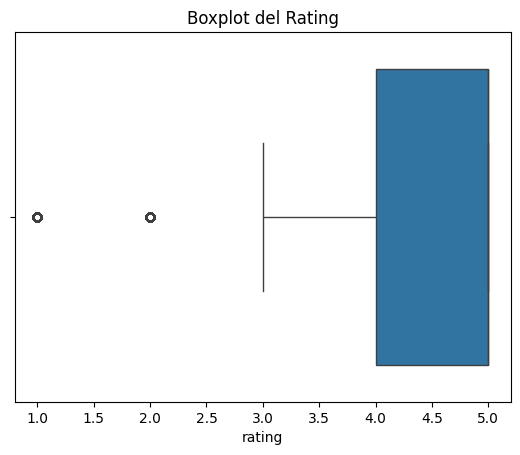

In [127]:
sns.boxplot(x='rating', data=df)
plt.title('Boxplot del Rating')
plt.show()

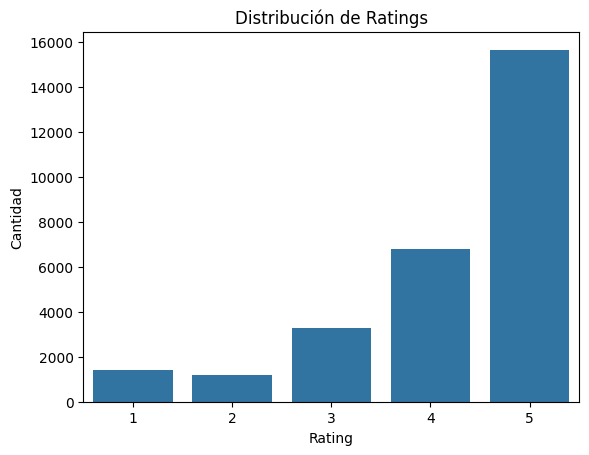

In [128]:
sns.countplot(x='rating', data=df)
plt.title('Distribución de Ratings')
plt.xlabel('Rating')
plt.ylabel('Cantidad')
plt.show()


In [129]:
# Contar cantidad de cada rating
rating_counts = df['rating'].value_counts().sort_index()

# Calcular porcentaje
rating_percentage = (rating_counts / len(df)) * 100

# Crear la tabla combinada
tabla_rating = pd.DataFrame({
    'Rating': rating_counts.index,
    'Cantidad': rating_counts.values,
    'Porcentaje (%)': rating_percentage.round(2)
})

# Mostrar la tabla
print(tabla_rating)

        Rating  Cantidad  Porcentaje (%)
rating                                  
1            1      1417            5.00
2            2      1173            4.14
3            3      3291           11.62
4            4      6793           23.97
5            5     15660           55.27


Análisis:

Más del 79% de las reseñas tienen 4 o 5 estrellas → fuerte tendencia positiva.

Solo el 9% son críticas negativas (1 o 2 estrellas).

El valor más común es 5 estrellas, lo que podría indicar alta satisfacción.


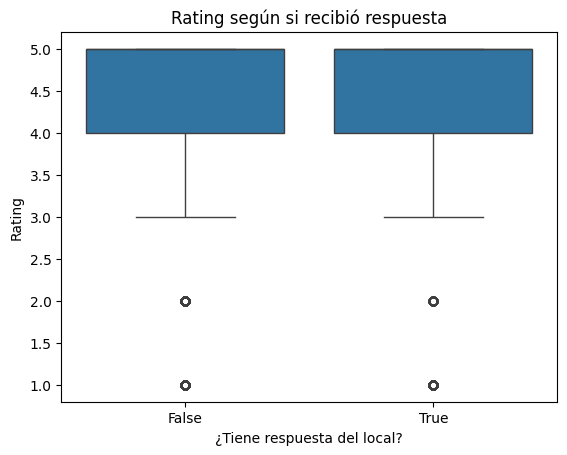

In [130]:
df['tiene_resp'] = df['resp'].notna()
sns.boxplot(x='tiene_resp', y='rating', data=df)
plt.title("Rating según si recibió respuesta")
plt.xlabel("¿Tiene respuesta del local?")
plt.ylabel("Rating")
plt.show()

Análisis:

No se muestra diferencias en la variacion de rating y la respuesta recibida

# Análisis de Review

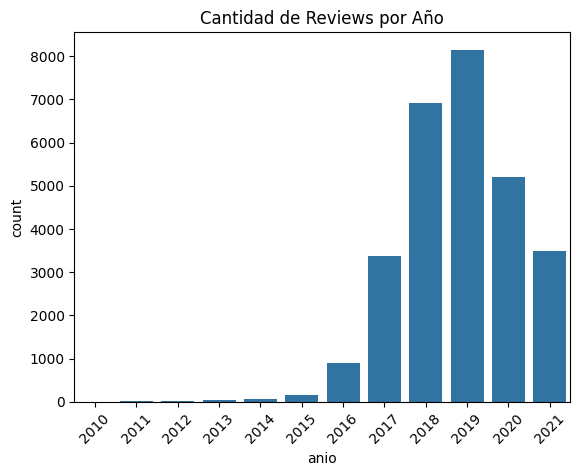

In [131]:
df['anio'] = df['fecha'].dt.year
sns.countplot(x='anio', data=df)
plt.title('Cantidad de Reviews por Año')
plt.xticks(rotation=45)
plt.show()

In [132]:
# Asegurate de tener la columna 'anio' creada desde la fecha
df['fecha'] = pd.to_datetime(df['time'], unit='ms')
df['anio'] = df['fecha'].dt.year

# Contar reviews por año
reviews_por_anio = df['anio'].value_counts().sort_index()

# Crear la tabla
tabla_reviews_anio = pd.DataFrame({
    'Año': reviews_por_anio.index,
    'Cantidad de Reviews': reviews_por_anio.values
})

# Mostrar la tabla
print(tabla_reviews_anio)

     Año  Cantidad de Reviews
0   2010                    3
1   2011                   19
2   2012                   30
3   2013                   37
4   2014                   56
5   2015                  165
6   2016                  897
7   2017                 3369
8   2018                 6927
9   2019                 8145
10  2020                 5196
11  2021                 3490


Análisis:

Se muestra un fuerte crecimiento desde 2015, con picos en 2018 y 2019.
Máximo en 2019: más de 8.500 reviews.
Caída en 2020 y 2021, posiblemente relacionada con la pandemia (COVID-19 afectó la movilidad y el turismo).
Antes de 2016, el volumen de reseñas era muy bajo.

In [95]:
total_reviews = len(df)

text_count = df['text'].notna().sum()
pics_count = df['pics'].notna().sum()
resp_count = df['resp'].notna().sum()

print(f"Reviews con texto: {text_count} ({(text_count / total_reviews * 100):.2f}%)")
print(f"Reviews con fotos: {pics_count} ({(pics_count / total_reviews * 100):.2f}%)")
print(f"Reviews con respuesta: {resp_count} ({(resp_count / total_reviews * 100):.2f}%)")

Reviews con texto: 16457 (58.08%)
Reviews con fotos: 743 (2.62%)
Reviews con respuesta: 3319 (11.71%)


In [133]:
print("Lugares únicos (gmap_id):", df['name_sitio'].nunique())

Lugares únicos (gmap_id): 246


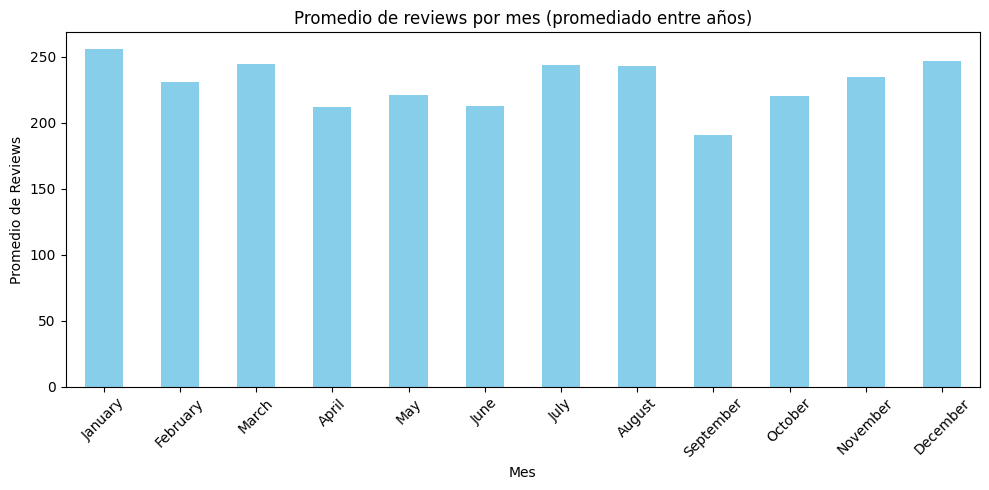

In [ ]:
# Asegurar que las fechas están en formato datetime
df['fecha'] = pd.to_datetime(df['time'], unit='ms')
df['anio'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month

# Agrupar por año y mes para contar reviews
grupo_anio_mes = df.groupby(['anio', 'mes']).size().reset_index(name='cantidad')

# Calcular promedio de reviews por mes (promediado entre años)
promedio_por_mes = grupo_anio_mes.groupby('mes')['cantidad'].mean()

# Asegurar que estén los 12 meses
promedio_por_mes = promedio_por_mes.reindex(range(1, 13), fill_value=0)



# Graficar
plt.figure(figsize=(10, 5))
promedio_por_mes.plot(kind='bar', color='skyblue')
plt.title("Promedio de reviews por mes (promediado entre años)")
plt.xlabel("Mes")
plt.ylabel("Promedio de Reviews")
plt.xticks(ticks=range(12), labels=[calendar.month_name[m] for m in range(1, 13)], rotation=45)
plt.tight_layout()
plt.show()

In [144]:
# Crear DataFrame con nombres de mes
tabla_reviews_mes = pd.DataFrame({
    'Mes': [calendar.month_name[m] for m in promedio_por_mes.index],
    'Promedio de Reviews': promedio_por_mes.values.round(2)
})

# Mostrar la tabla
print(tabla_reviews_mes)

          Mes  Promedio de Reviews
0     January               255.60
1    February               230.64
2       March               244.36
3       April               211.60
4         May               220.55
5        June               212.36
6        July               243.50
7      August               242.70
8   September               190.50
9     October               219.80
10   November               234.33
11   December               246.67


Análisis:

Actividad moderada en todo el año
Aunque no hay picos extremos, enero, marzo y mayo muestran una actividad más fuerte en promedio.

Meses más bajos: abril y septiembre
Estos meses tienden a tener menos reseñas en comparación con otros. Esto podría deberse a
temporada baja de turismo o consumo, 
condiciones climáticas o feriados que afectan el tráfico de personas.

No hay una estacionalidad clara y marcada
La diferencia entre los meses no es tan extrema como para pensar en una única temporada fuerte. Es una distribución relativamente estable, pero con altibajos sutiles.

# Análisis de Lugares

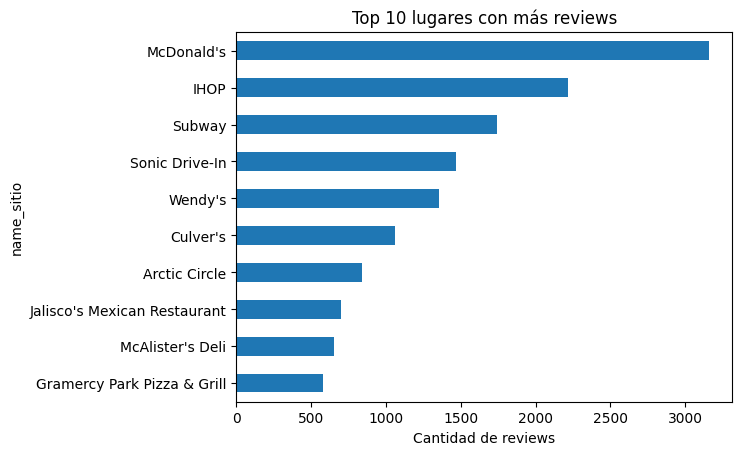

In [150]:
top_lugares = df['name_sitio'].value_counts().head(10)
top_lugares.plot(kind='barh')
plt.title("Top 10 lugares con más reviews")
plt.xlabel("Cantidad de reviews")
plt.ylabel("name_sitio")
plt.gca().invert_yaxis()
plt.show()

C:\Users\pablo\AppData\Local\Temp\ipykernel_10440\3670408486.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top10['name_sitio'], rotation=45, ha='right')


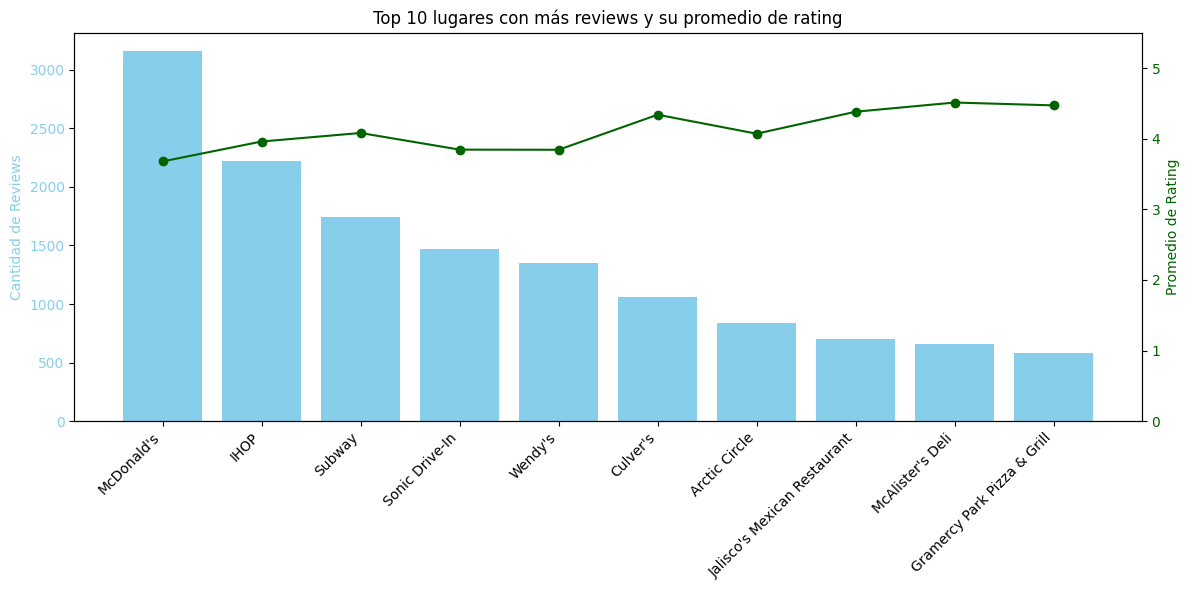

In [ ]:
# Agrupar por lugar: contar y promediar ratings
estadisticas = df.groupby('name_sitio')['rating'].agg(['count', 'mean']).reset_index()
estadisticas.columns = ['name_sitio', 'Cantidad de Reviews', 'Promedio de Rating']

# Filtrar lugares con al menos 50 reviews
estadisticas_filtradas = estadisticas[estadisticas['Cantidad de Reviews'] >= 50]

# Elegir los 10 lugares con más reviews (para orden visual claro)
top10 = estadisticas_filtradas.sort_values(by='Cantidad de Reviews', ascending=False).head(10)

# Crear gráfico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Eje izquierdo: cantidad de reviews
ax1.bar(top10['name_sitio'], top10['Cantidad de Reviews'], color='skyblue', label='Cantidad de Reviews')
ax1.set_ylabel('Cantidad de Reviews', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(top10['name_sitio'], rotation=45, ha='right')

# Eje derecho: promedio de rating
ax2 = ax1.twinx()
ax2.plot(top10['name_sitio'], top10['Promedio de Rating'], color='darkgreen', marker='o', label='Promedio de Rating')
ax2.set_ylabel('Promedio de Rating', color='darkgreen')
ax2.tick_params(axis='y', labelcolor='darkgreen')
ax2.set_ylim(0, 5.5)

# Título y leyenda
plt.title('Top 10 lugares con más reviews y su promedio de rating')
fig.tight_layout()
plt.show()



Análisis:
Todos los lugares del top tienen un rating promedio alto, mayor a 3, lo que muestra una alta satisfacción de los usuarios.

La cantidad de reviews varía, pero todos superan las 500, lo cual da más confianza en la calidad del promedio.

McDonals´s a pesar de tener el numero mayor de review tiene el promedio de rating mas bajo del top.

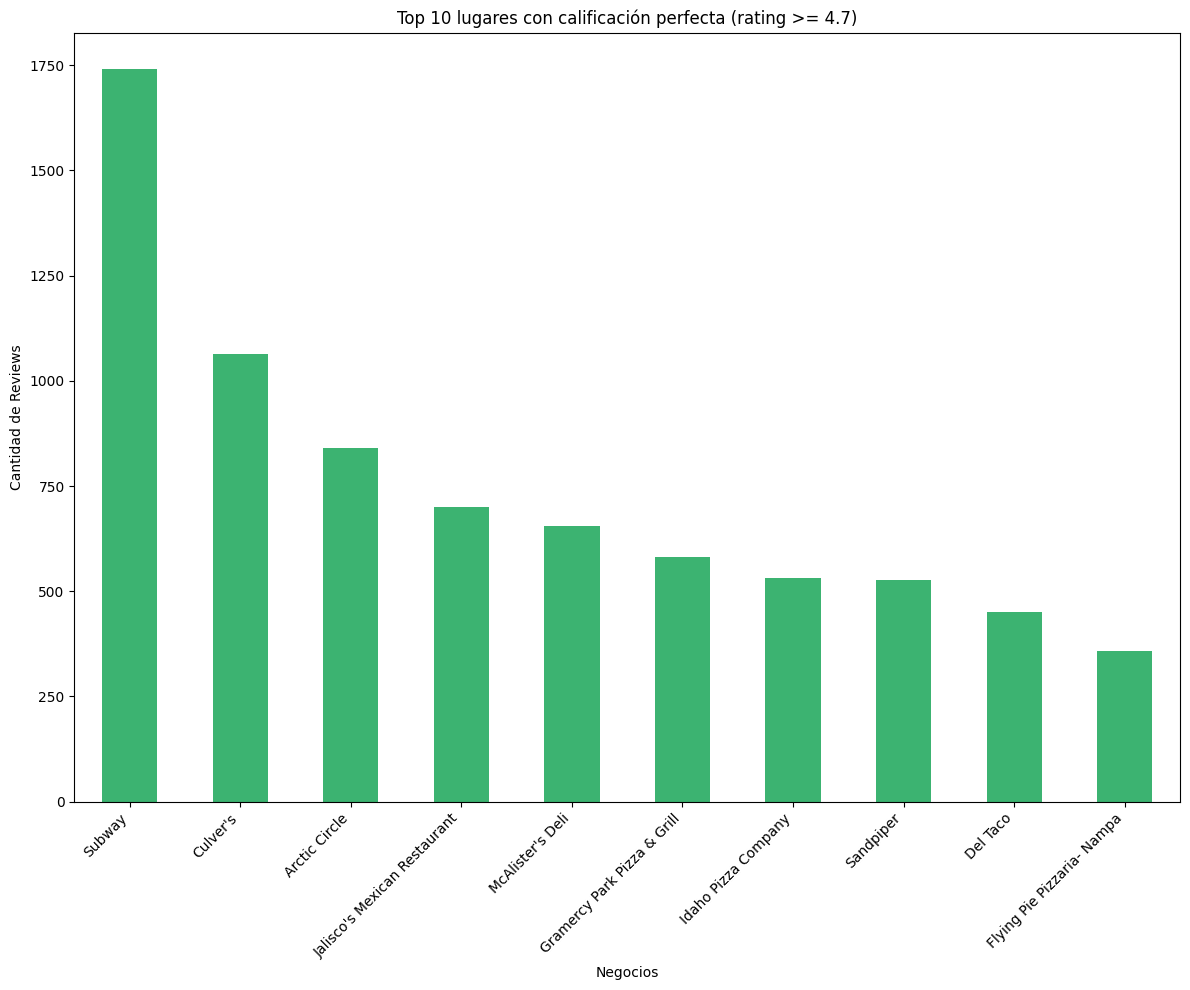

In [ ]:
# Asegurar que la fecha esté en formato datetime (por si acaso)
df['fecha'] = pd.to_datetime(df['time'], unit='ms')

# Calcular el promedio de rating por lugar (gmap_id)
rating_promedio = df.groupby('name_sitio')['rating'].mean()

# Filtrar lugares con calificación perfecta
rating_maximos = rating_promedio[rating_promedio >= 4]

# Filtrar el DataFrame original para obtener solo esos lugares
top_rating_5 = df[df['name_sitio'].isin(rating_maximos.index)]

# Contar cantidad de reviews por gmap_id con rating >= 4 y quedarnos con los 10 más reseñados
top_rating_5_count = top_rating_5['name_sitio'].value_counts().head(10)

# Graficar
plt.figure(figsize=(12, 10))
top_rating_5_count.plot(kind='bar', color='mediumseagreen')
plt.title("Top 10 lugares con calificación perfecta (rating >= 4)")
plt.xlabel("Negocios")
plt.ylabel("Cantidad de Reviews")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Análisis:

Alta satisfacción con volumen relevante, todos los lugares listados tienen una combinación ideal de rating alto y muchas reseñas. Eso indica que no solo tuvieron buena suerte con pocas opiniones, sino que muchos usuarios coincidieron en su buena experiencia. Se marca la diferencia del negocio Subway por la cantidad de reviews.

Estos 10 lugares combinan excelencia en atención/producto con volumen de participación de usuarios, lo que los posiciona como referentes en calidad y satisfacción.